<h1> SANBERCODE DATA SCIENCE BOOTCAMP </h1>

- this repository is created to accomplish sanbercode data science final assignment
- https://www.kaggle.com/c/sanbercode-data-science/data?select=Pendapatan.csv

![title](title.png)

In [1]:
import pandas as pd

df      = pd.read_csv('Pendapatan.csv')
dftest  = pd.read_csv('Pendapatan_test.csv')

In [2]:
df.isna().sum()

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

In [3]:
dftest.isna().sum()

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
dftest.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38393 non-null  int64  
 1   Umur                   38393 non-null  int64  
 2   Kelas Pekerja          38393 non-null  object 
 3   Berat Akhir            38393 non-null  int64  
 4   Pendidikan             38393 non-null  object 
 5   Jmlh Tahun Pendidikan  38393 non-null  int64  
 6   Status Perkawinan      38393 non-null  object 
 7   Pekerjaan              38393 non-null  object 
 8   Jenis Kelamin          38393 non-null  object 
 9   Keuntungan Kapital     38393 non-null  float64
 10  Kerugian Capital       38393 non-null  float64
 11  Jam per Minggu         38393 non-null  float64
 12  Gaji                   38393 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 3.8+ MB


In [7]:
for i in df.columns:
    print(f'{df[i].value_counts(normalize=True)*100}\n\n')

2047     0.002605
13836    0.002605
1546     0.002605
7689     0.002605
26118    0.002605
           ...   
21343    0.002605
19292    0.002605
29531    0.002605
31578    0.002605
0        0.002605
Name: id, Length: 38393, dtype: float64


36    2.745292
33    2.727060
35    2.708827
31    2.682781
23    2.677571
        ...   
83    0.023442
88    0.013023
87    0.007814
85    0.005209
86    0.002605
Name: Umur, Length: 73, dtype: float64


Wiraswasta                       69.254812
Pekerja Bebas Bukan Perusahan     8.001459
Pemerintah Lokal                  6.391790
?                                 5.740630
Pemerintah Negara                 4.112729
Pekerja Bebas Perusahaan          3.503243
Pemerintah Provinsi               2.938036
Tanpa di Bayar                    0.041674
Tidak Pernah Bekerja              0.015628
Name: Kelas Pekerja, dtype: float64


203488    0.044279
126569    0.041674
190290    0.041674
186934    0.039070
120277    0.036465
            ...   
43878     0.002

In [8]:
for i in dftest.columns:
    print(f'{dftest[i].value_counts(normalize=True)*100}\n\n')

20478    0.010418
38304    0.010418
46492    0.010418
19867    0.010418
17818    0.010418
           ...   
35847    0.010418
4799     0.010418
6846     0.010418
701      0.010418
32768    0.010418
Name: id, Length: 9599, dtype: float64


23    2.906553
36    2.854464
35    2.844046
31    2.823211
30    2.791957
        ...   
82    0.020836
85    0.020836
89    0.020836
84    0.010418
88    0.010418
Name: Umur, Length: 72, dtype: float64


Wiraswasta                       69.944786
Pekerja Bebas Bukan Perusahan     7.625794
Pemerintah Lokal                  6.500677
?                                 5.750599
Pemerintah Negara                 3.917075
Pekerja Bebas Perusahaan          3.292010
Pemerintah Provinsi               2.906553
Tanpa di Bayar                    0.041671
Tidak Pernah Bekerja              0.020836
Name: Kelas Pekerja, dtype: float64


241998    0.083342
167482    0.062507
113364    0.062507
156464    0.062507
193882    0.052089
            ...   
142689    0.0104

* Column kelas pekerja, pekerjaan has '?' value, we assume that value is NaN, want to replace that value with median because its only 5% of total data
* The target variable 'Gaji' has imbalance problem, we want to balance our dataset so our model can predict more precise

In [9]:
df.groupby('Gaji')['Pekerjaan'].value_counts()

Gaji  Pekerjaan            
0     Pemuka Agama             3778
      Perbaikan Kerajinan      3723
      Servis Lainnya           3708
      Sales                    3160
      Spesialis                2699
      Ekesekutif Managerial    2521
      Mesin Inspeksi           2072
      ?                        1995
      Pembersih                1542
      Supir                    1476
      Petani                   1018
      Tech-support              795
      Penjaga                   509
      Asisten Rumah Tangga      195
      Tentara                     7
1     Ekesekutif Managerial    2269
      Spesialis                2212
      Sales                    1163
      Perbaikan Kerajinan      1065
      Pemuka Agama              630
      Supir                     383
      Tech-support              327
      Mesin Inspeksi            308
      Penjaga                   225
      ?                         215
      Servis Lainnya            151
      Petani                    132


In [10]:
df.groupby('Gaji')['Kelas Pekerja'].value_counts()

Gaji  Kelas Pekerja                
0     Wiraswasta                       20812
      Pekerja Bebas Bukan Perusahan     2225
      ?                                 1989
      Pemerintah Lokal                  1727
      Pemerintah Negara                 1150
      Pemerintah Provinsi                675
      Pekerja Bebas Perusahaan           600
      Tanpa di Bayar                      14
      Tidak Pernah Bekerja                 6
1     Wiraswasta                        5777
      Pekerja Bebas Bukan Perusahan      847
      Pekerja Bebas Perusahaan           745
      Pemerintah Lokal                   727
      Pemerintah Provinsi                453
      Pemerintah Negara                  429
      ?                                  215
      Tanpa di Bayar                       2
Name: Kelas Pekerja, dtype: int64

In [11]:
df[df['Pekerjaan'] == 'Ekesekutif Managerial']['Kelas Pekerja'].value_counts()

Wiraswasta                       3130
Pekerja Bebas Perusahaan          483
Pekerja Bebas Bukan Perusahan     469
Pemerintah Lokal                  268
Pemerintah Negara                 234
Pemerintah Provinsi               206
Name: Kelas Pekerja, dtype: int64

In [12]:
df[df['Pekerjaan'] == 'Pemuka Agama']['Kelas Pekerja'].value_counts()

Wiraswasta                       3285
Pemerintah Provinsi               397
Pemerintah Lokal                  329
Pemerintah Negara                 300
Pekerja Bebas Bukan Perusahan      58
Pekerja Bebas Perusahaan           37
Tanpa di Bayar                      2
Name: Kelas Pekerja, dtype: int64

In [54]:
import numpy as np

X   = df
X[['Pekerjaan','Kelas Pekerja']] = df[['Pekerjaan','Kelas Pekerja']].replace('?', np.nan)

X   = X.dropna(axis=0)
y   = X[['Pekerjaan','Kelas Pekerja']]

X   = X.drop(['Pekerjaan','Kelas Pekerja'], axis=1)

In [59]:
from sklearn.preprocessing import StandardScaler

for i in X[['Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan','Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']]:
    X[i] = StandardScaler().fit_transform(X[[i]])    

In [60]:
pendidikan  =  {'1st-4th':1,
                '5th-6th':1,
                'SD':1,
                '7th-8th':2,
                '9th':2,
                '10th':3,
                '11th':3,
                '12th':3,
                'SMA':3,
                'Sekolah Professional':4,
                'D3':5,
                'D4':5,
                'Pendidikan Tinggi':5,
                'Sarjana':5,
                'Master':6,
                'Doktor':7
                }

perkawinan  = { 'Menikah': 1,
                'Belum Pernah Menikah': 0,
                'Cerai': 2,
                'Janda': 2,
                'Berpisah': 2,
                'Menikah LDR': 1
                }


X['Pendidikan']         = X['Pendidikan'].replace(pendidikan)
X['Status Perkawinan']  = X['Status Perkawinan'].replace(perkawinan)
X['Jenis Kelamin']      = X['Jenis Kelamin'].replace({'Laki2':1, 'Perempuan':0})
X   = pd.get_dummies(X)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test    = train_test_split(X,y,stratify=y, test_size=0.3)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [13]:
tempsatu    = df[df['Gaji'] == 1]
tempnol     = df[df['Gaji'] == 0]

tempsatu['Pekerjaan']   = tempsatu['Pekerjaan'].replace('?','Ekesekutif Managerial')
tempnol['Pekerjaan']    = tempnol['Pekerjaan'].replace('?','Pemuka Agama')

tempsatu['Kelas Pekerja']   = tempsatu['Kelas Pekerja'].replace('?','Wiraswasta')
tempnol['Kelas Pekerja']    = tempnol['Kelas Pekerja'].replace('?','Wiraswasta')

tempnol     = tempnol[:len(tempsatu)]
dfnew       = pd.concat([tempsatu,tempnol])

dfnew['Gaji'].value_counts()

1    9195
0    9195
Name: Gaji, dtype: int64

In [14]:

dftest['Pekerjaan']     = dftest['Pekerjaan'].replace('?','Ekesekutif Managerial')
dftest['Kelas Pekerja'] = dftest['Kelas Pekerja'].replace('?','Wiraswasta')

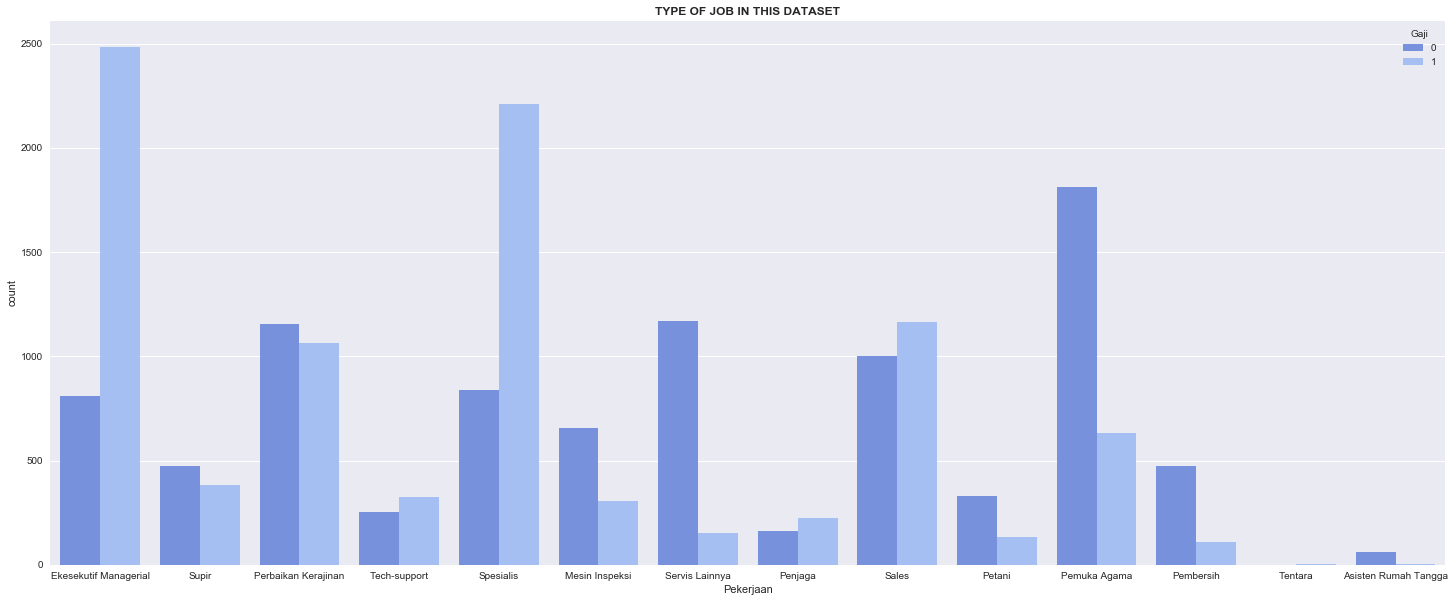

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('coolwarm')
fig, ax = plt.subplots(figsize=[25,10])
sns.countplot(dfnew['Pekerjaan'], hue=dfnew['Gaji'])
ax.set_title('TYPE OF JOB IN THIS DATASET', fontweight='bold')
plt.show()

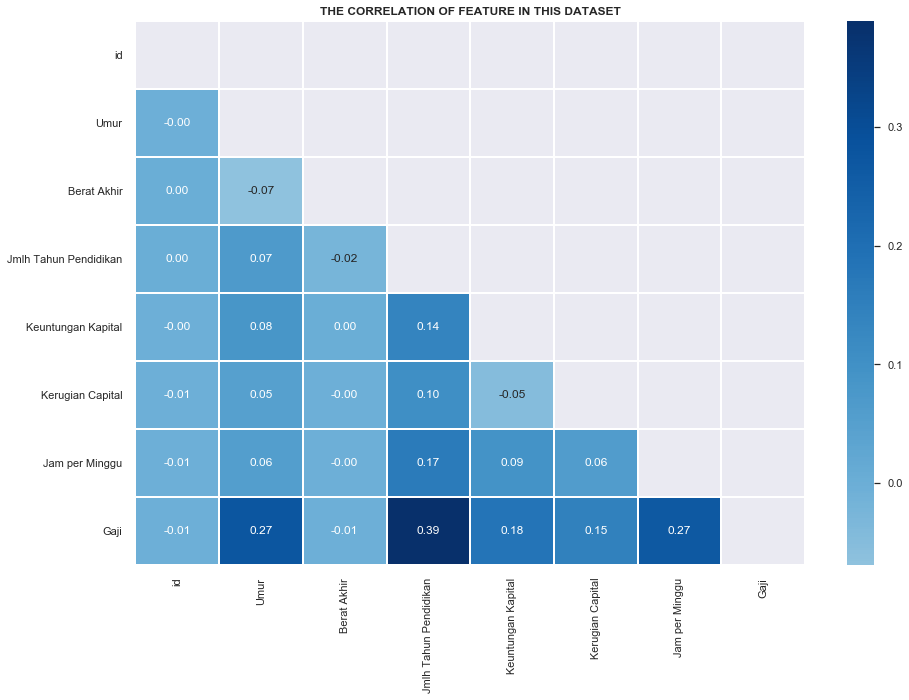

In [16]:
import numpy as np

sns.set()
corr = dfnew.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=[15,10])
plt.title('THE CORRELATION OF FEATURE IN THIS DATASET',fontweight='bold')
sns.heatmap(corr, mask=mask, cmap='Blues', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [17]:
for i in dfnew.select_dtypes(include='object'):
    print(f'{dfnew[i].value_counts()}\n\n')

Wiraswasta                       13151
Pekerja Bebas Bukan Perusahan     1583
Pemerintah Lokal                  1279
Pekerja Bebas Perusahaan           936
Pemerintah Negara                  773
Pemerintah Provinsi                661
Tanpa di Bayar                       5
Tidak Pernah Bekerja                 2
Name: Kelas Pekerja, dtype: int64


SMA                     5299
Sarjana                 3787
Pendidikan Tinggi       3760
Master                  1422
D4                       752
D3                       609
Sekolah Professional     555
11th                     515
10th                     406
Doktor                   389
7th-8th                  258
9th                      212
12th                     173
5th-6th                  149
1st-4th                   82
SD                        22
Name: Pendidikan, dtype: int64


Menikah                 10887
Belum Pernah Menikah     4376
Cerai                    2032
Janda                     456
Berpisah                  440
Menik

In [18]:
dfnew.select_dtypes(include=['int64','float64']).columns

Index(['id', 'Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan',
       'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu', 'Gaji'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler

for i in dfnew[['Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan','Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']]:
    dfnew[i] = StandardScaler().fit_transform(dfnew[[i]])    

In [20]:
for i in dftest[['Umur', 'Berat Akhir', 'Jmlh Tahun Pendidikan','Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu']]:
    dftest[i] = StandardScaler().fit_transform(dftest[[i]]) 

In [21]:
pendidikan  =  {'1st-4th':1,
                '5th-6th':1,
                'SD':1,
                '7th-8th':2,
                '9th':2,
                '10th':3,
                '11th':3,
                '12th':3,
                'SMA':3,
                'Sekolah Professional':4,
                'D3':5,
                'D4':5,
                'Pendidikan Tinggi':5,
                'Sarjana':5,
                'Master':6,
                'Doktor':7
                }

perkawinan  = { 'Menikah': 1,
                'Belum Pernah Menikah': 0,
                'Cerai': 2,
                'Janda': 2,
                'Berpisah': 2,
                'Menikah LDR': 1
                }


dfnew['Pendidikan']         = dfnew['Pendidikan'].replace(pendidikan)
dfnew['Status Perkawinan']  = dfnew['Status Perkawinan'].replace(perkawinan)
dfnew['Jenis Kelamin']      = dfnew['Jenis Kelamin'].replace({'Laki2':1, 'Perempuan':0})
dfnew   = pd.get_dummies(dfnew)

In [22]:
dftest['Pendidikan']         = dftest['Pendidikan'].replace(pendidikan)
dftest['Status Perkawinan']  = dftest['Status Perkawinan'].replace(perkawinan)
dftest['Jenis Kelamin']      = dftest['Jenis Kelamin'].replace({'Laki2':1, 'Perempuan':0})
dftest  = pd.get_dummies(dftest)

In [23]:
X   = dfnew.drop(['Gaji','id'], axis=1)
y   = dfnew['Gaji']

testdata  = dftest.drop('id', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [25]:
X_train, X_test, y_train, y_test    = train_test_split(X, y, stratify=y, test_size=0.3, random_state=46)

rf  = RandomForestClassifier().fit(X_train,y_train)

In [26]:
cv  =   cross_val_score(rf, X, y, scoring='roc_auc', cv=10, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [27]:
cv  = list(cv)

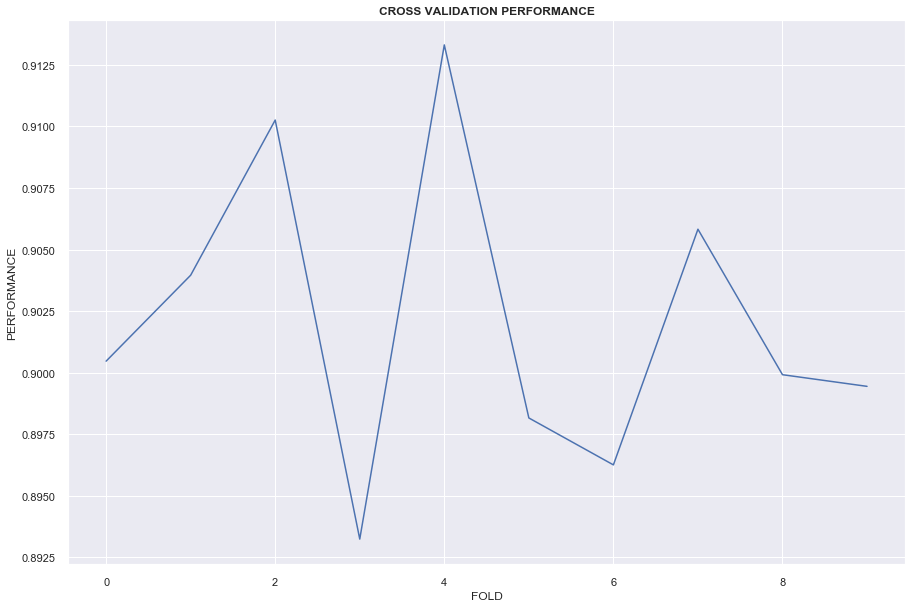

In [28]:
fig, ax = plt.subplots(figsize=[15,10])
ax.plot(np.arange(10), cv)
ax.set_title('CROSS VALIDATION PERFORMANCE', fontweight='bold')
ax.set_xlabel('FOLD')
ax.set_ylabel('PERFORMANCE')
plt.show()

In [29]:
accuracy_score(y_test, rf.predict(X_test))

0.811310494834149

In [30]:
print(classification_report(y_test, rf.predict(X_test)))

precision    recall  f1-score   support

           0       0.82      0.79      0.81      2758
           1       0.80      0.83      0.81      2759

    accuracy                           0.81      5517
   macro avg       0.81      0.81      0.81      5517
weighted avg       0.81      0.81      0.81      5517



In [31]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [32]:
rfparam =  {'bootstrap': [True, False],            
            'class_weight': ['balanced','balanced_subsample'],
            'criterion': ['gini','entropy'],
            'max_depth': [5,50,100],
            'max_features': ['auto','sqrt','log2'],
            'max_leaf_nodes': [5, 50, 100, None],
            'max_samples': [5, 50, 100, None],                        
            'min_samples_leaf': [1, 5, 10, 500],
            'min_samples_split': [2, 6, 10],            
            'n_estimators': [31, 62, 100, 128],            
            'oob_score': [True,False],            
            'verbose': [1],
            'warm_start': [False, True] 
            }

In [33]:
from sklearn.model_selection import RandomizedSearchCV

rftune  = RandomizedSearchCV(rf, param_distributions=rfparam, scoring='roc_auc', cv=10, verbose=1, return_train_score=True, n_iter=100).fit(X_train, y_train)

obs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

KeyboardInterrupt: 

In [129]:
rftune.best_params_

{'warm_start': True,
 'verbose': 1,
 'oob_score': False,
 'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 100,
 'max_leaf_nodes': 100,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'bootstrap': False}

In [128]:
fix = RandomForestClassifier(warm_start=True, 
                            verbose=1, 
                            oob_score=False, 
                            n_estimators=100, 
                            min_samples_split=10, 
                            min_samples_leaf=1,
                            max_samples=100,
                            max_leaf_nodes=100,
                            max_features='auto',
                            max_depth=50,
                            criterion='gini',
                            class_weight='balanced_subsample',
                            bootstrap=False
                            ).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [130]:
accuracy_score(y_test, fix.predict(X_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8209171651259742

In [133]:
print(classification_report(y_test, fix.predict(X_test)))

precision    recall  f1-score   support

           0       0.85      0.77      0.81      2758
           1       0.79      0.87      0.83      2759

    accuracy                           0.82      5517
   macro avg       0.82      0.82      0.82      5517
weighted avg       0.82      0.82      0.82      5517

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [134]:
#Predict test data

new         = pd.DataFrame()
new['id']   = dftest['id']
new['Gaji'] = fix.predict(new_testdata)

new.to_csv('sebastiancahyoardhiiswara@gmail.com.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [36]:
X.shape

(18390, 31)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks.callbacks import EarlyStopping, ModelCheckpoint

model   = Sequential()
model.add(Dense(31, activation='relu',input_shape=(31,)))
model.add(Dense(31, activation='relu'))
model.add(Dense(31, activation='relu'))
model.add(Dense(31, activation='relu'))
model.add(Dense(31, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()                                    

stopping    = EarlyStopping(monitor='val_loss',
                            patience=10,
                            mode='min',
                            restore_best_weights=True)

history     = model.fit(
            x=X_train,
            y=y_train,
            batch_size=32,
            epochs=1000,
            validation_data=(X_test, y_test),
            shuffle=True,
            use_multiprocessing=True,
            callbacks=[stopping]                                    
            )


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 31)                992       
_________________________________________________________________
dense_14 (Dense)             (None, 31)                992       
_________________________________________________________________
dense_15 (Dense)             (None, 31)                992       
_________________________________________________________________
dense_16 (Dense)             (None, 31)                992       
_________________________________________________________________
dense_17 (Dense)             (None, 31)                992       
_________________________________________________________________
dropout_3 (Dropout)          (None, 31)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                